<a href="https://colab.research.google.com/github/MaryamFarhat/MaryamFarhat/blob/main/uberProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

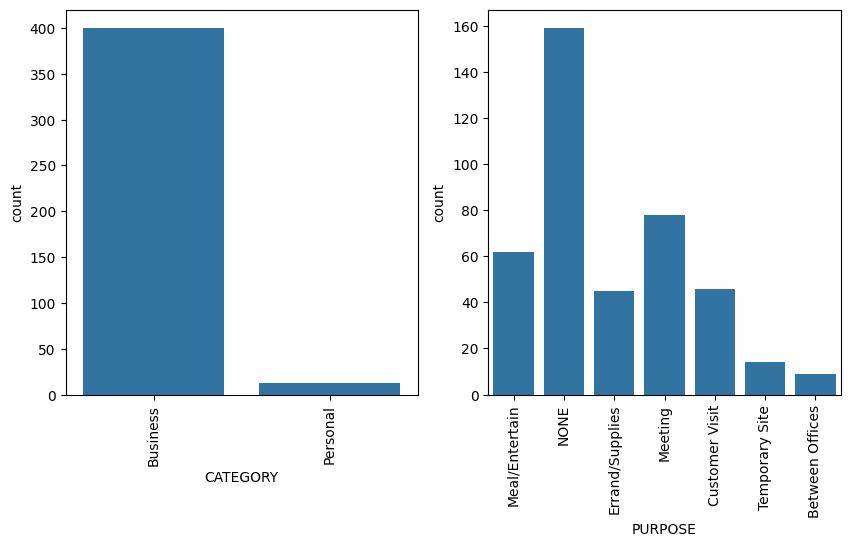

In [2]:
import tkinter
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
dataset = pd.read_csv("/content/UberDataset.csv")
dataset.head()

dataset.fillna({"PURPOSE": "NONE"}, inplace=True)

dataset['START_DATE']=pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATE']=pd.to_datetime(dataset['END_DATE'],errors='coerce')
dataset['date']=pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time']=pd.DatetimeIndex(dataset['START_DATE']).hour
dataset['day-night'] = pd.cut(
    x=dataset['time'],
    bins = [0, 10, 15, 19, 24],
    labels = ['Morning', 'Afternoon', 'Evening', 'Night']
)
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

#1er plot category/purpose
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='CATEGORY', data=dataset)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='PURPOSE', data=dataset)

plt.xticks(rotation=90)
plt.show()





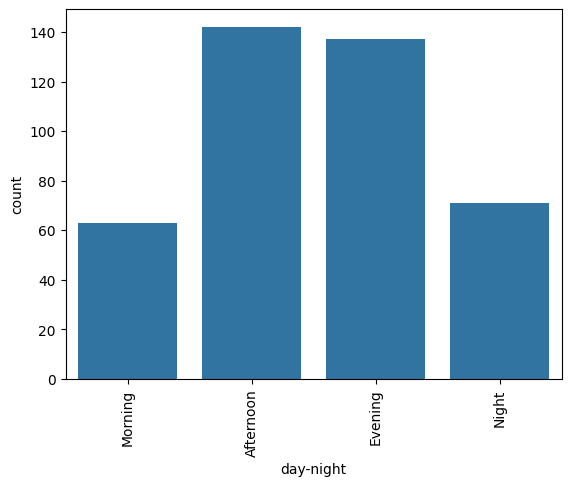

In [3]:
sns.countplot(x='day-night', data=dataset)
plt.xticks(rotation=90)
plt.show()

In [4]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NONE,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening


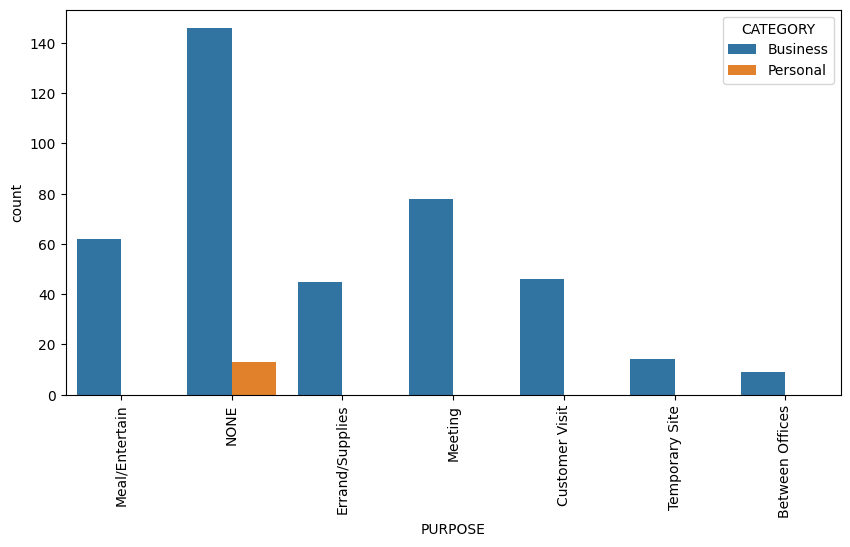

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(data=dataset,x='PURPOSE',hue='CATEGORY')
#hue is used to add a third dimension to your plot by introducing color-coded categories
plt.xticks(rotation=90)
plt.show()

In [12]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

<Axes: >

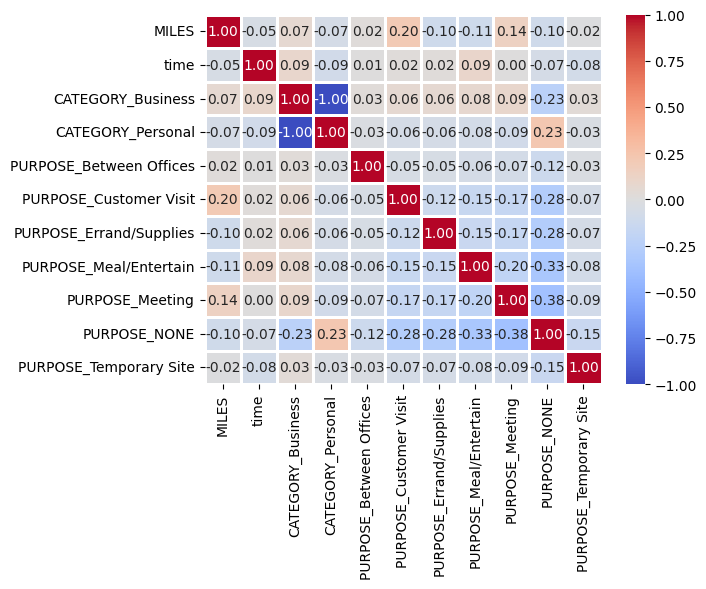

In [16]:
numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(),
            cmap='coolwarm',
            fmt='.2f',
            linewidths=2,
            annot=True)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'COUNT')]

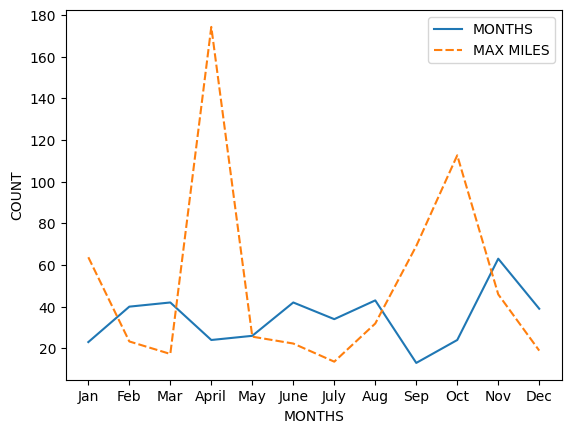

In [38]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "MAX MILES": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="COUNT")


In [41]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)


Text(0, 0.5, 'COUNT')

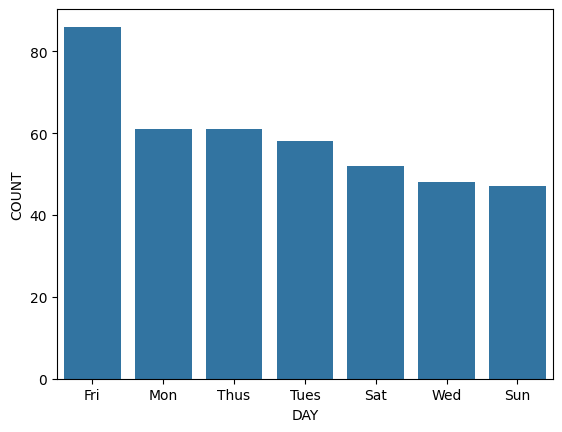

In [40]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


<Axes: ylabel='MILES'>

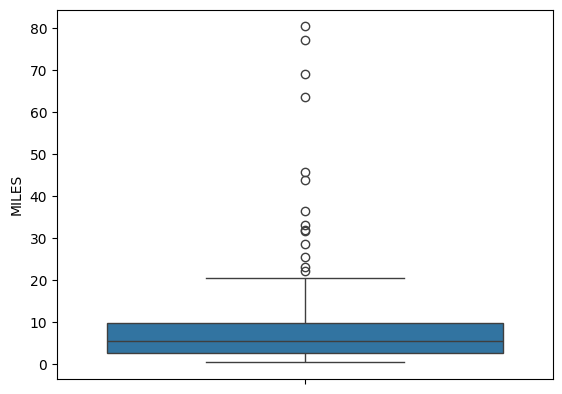

In [43]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

<ipython-input-46-1d5904d4eb1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

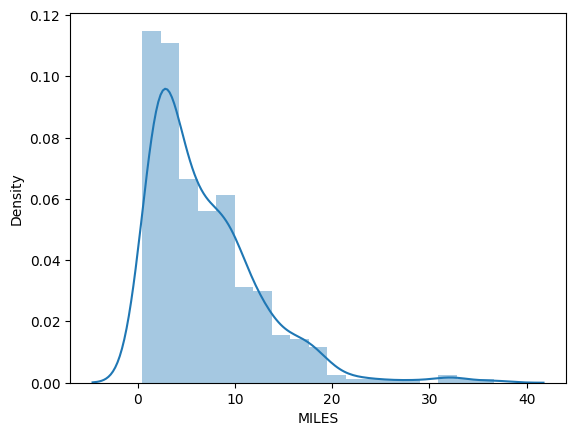

In [46]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])